# Phase IV Fatima Work

In [2]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
sqf2011= pd.read_csv('sqf2011_final_sample')
sqf2019= pd.read_csv('sqf2019_final_sample')

In [4]:
sqf2011copy1 = sqf2011.copy()
sqf2019copy1 = sqf2019.copy()

## Defining Functions

### a) Logistic Regression Prediction Accuracy Function:

In [5]:
def LogR(logdf, getbinary, targetvar):
    """ creates a df with only vars of interest with indicator variables, runs a logistic regression on that and returns a prediction accuracy percentage.
    Parameters: logdf is a df with only the variables in interest for logistic regression. 
    targetvar is a string of the target variable for the logistic regression.
    getbinary is a dataframe with columns that need to be given indicator variables and will then be added on to the logistic_data df.
      """
    newgetbinary = pd.get_dummies(getbinary)               # creating new df for log regression
    newlogdf = pd.concat([logdf, newgetbinary], axis=1)

    predictors = list(newlogdf.columns)
    predictors.remove(targetvar)
    train,test = train_test_split(newlogdf, test_size=0.2, random_state=15)
    logmod= LogisticRegression(solver='lbfgs', max_iter=1000);
    logmod.fit(train[predictors], train[targetvar])  
    tepreds=logmod.predict(test[predictors])
    
    return "the prediction accuracy as a percentage is {:.1f}.".format(np.sum(tepreds==test[targetvar])/len(tepreds)*100)

### b) Predictors Coefficients Function:

In [6]:
def coeffs(logdf, getbinary, targetvar): 
    """Prints a list of coefficients and displays a plot of the coefficents in descending order.
    Parameters: logdf is a dataframe with only variables of intereset for logistic regression.
    getbinary is a dataframe with variables that need to be given indicator variables for running a  logistic regression.
    targetvar is a string of the target variable name for the logistic regression.
    """
    newgetbinary = pd.get_dummies(getbinary)
    newlogdf = pd.concat([logdf, newgetbinary], axis=1)  
    predictors = list(newlogdf.columns);
    predictors.remove(targetvar);
    train,test = train_test_split(newlogdf, test_size=0.2, random_state=15);
    logmod = LogisticRegression(solver='lbfgs', max_iter=1000);
    logmod.fit(train[predictors], train[targetvar]);
    
    # print the coefficients legibly
    for i, predictor in enumerate(predictors):
        print(f'{logmod.coef_[0,i]:.3f}\t{predictor}')

    # plot predictors by lean
    df = pd.DataFrame({'coef':logmod.coef_[0]}, index=predictors)
    df.sort_values(by='coef').plot.barh(legend=False);

## Logistic Regression Models

### Frisked (2011)

In [7]:
flogdf2011 = sqf2011copy1[['frisked', 'obs_duration', 'age']]  # first, just the 'frisked', 'obs_duration', 'age' columns
fgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the model to predict whether one is frisked in the 2011 test set:")
LogR(flogdf2011, fgetbinary2011, 'frisked')

Using the model to predict whether one is frisked in the 2011 test set:


'the prediction accuracy as a percentage is 62.0.'

Based on the Chi square tests all the predictor vairbales have a statistically significant association with whether someone is Frisked in 2011.

-0.004	obs_duration
-0.019	age
-0.507	sex_FEMALE
0.431	sex_MALE
0.264	sex_UNKNOWN
0.020	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.205	race_ASIAN/PACIFIC ISLANDER
0.273	race_BLACK
0.179	race_BLACK HISPANIC
-0.048	race_UNKNOWN
-0.166	race_WHITE
0.136	race_WHITE HISPANIC
0.403	boro_BRONX
-0.168	boro_BROOKLYN
-0.100	boro_MANHATTAN
0.292	boro_QUEENS
-0.237	boro_STATEN IS


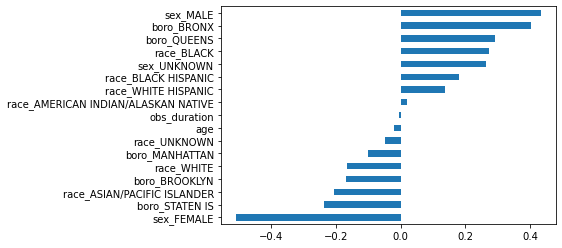

In [8]:
coeffs(flogdf2011, fgetbinary2011, 'frisked')

According to the plot, the four most influential variables on getting frisked in 2011 are being male, in the Bronx or Queens, and Black.

## Frisked 2019

In [9]:
flogdf2019 = sqf2019copy1[['frisked', 'obs_duration', 'age']]  # first, just the 'frisked', 'obs_duration', 'age' columns
fgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
print("Using the model to predict whether one is frisked in the 2019 test set:")
LogR(flogdf2019, fgetbinary2019, 'frisked')

Using the model to predict whether one is frisked in the 2019 test set:


'the prediction accuracy as a percentage is 63.8.'

-0.001	obs_duration
-0.013	age
-0.344	sex_FEMALE
0.595	sex_MALE
-0.316	sex_UNKNOWN
-0.031	race_AMERICAN INDIAN/ALASKAN N
-0.109	race_ASIAN / PACIFIC ISLANDER
0.148	race_BLACK
-0.079	race_BLACK HISPANIC
0.038	race_UNKNOWN
-0.175	race_WHITE
0.145	race_WHITE HISPANIC
0.486	boro_BRONX
0.275	boro_BROOKLYN
-0.142	boro_MANHATTAN
-0.114	boro_QUEENS
-0.570	boro_STATEN ISLAND


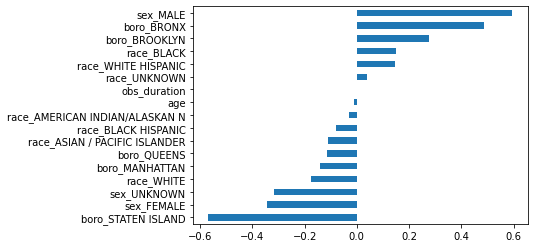

In [10]:
coeffs(flogdf2019, fgetbinary2019, 'frisked')

According to the plot of coefficients from the inital logistic regression, the most influential factors on whether someone is frisked in 2019 are if they are a male, in the Bronx or Brooklyn, and Black.

## Optimized Frisked 2019

Based on our chi squared tests, sex, race and boro have a statistically significant association with whether someone is frisked in 2019. 

In [310]:
optflogdf2019 = sqf2019copy1[['frisked']]
optfgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is frisked in the 2019 test set:")
LogR(optflogdf2019, optfgetbinary2019, 'frisked')

Using the *optimized* model to predict whether one is frisked in the 2019 test set:


'the prediction accuracy as a percentage is 62.2.'

-0.322	sex_FEMALE
0.612	sex_MALE
-0.292	sex_UNKNOWN
-0.017	race_AMERICAN INDIAN/ALASKAN N
-0.148	race_ASIAN / PACIFIC ISLANDER
0.162	race_BLACK
-0.048	race_BLACK HISPANIC
0.101	race_UNKNOWN
-0.211	race_WHITE
0.158	race_WHITE HISPANIC
0.491	boro_BRONX
0.278	boro_BROOKLYN
-0.143	boro_MANHATTAN
-0.091	boro_QUEENS
-0.538	boro_STATEN ISLAND


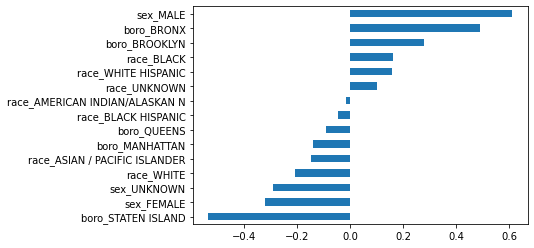

In [311]:
coeffs(optflogdf2019, optfgetbinary2019, 'frisked')

According to the plot of coefficients from the optimized logistic regression, the four variables with the most impact on whether one is frisked in 2019 are being a male, in the Bronx or Brooklyn, and Black.

The initial prediciton accuracy of our logistic regression is 63.8 percent while our optimized prediciton accuracy is 62.2 percent. Our chi-squared test determined that observation duration and age have no significant association with whether one is frisked in 2019. The bar plot also shows that obs_duration and age have coefficients very close to 0, meaning they have little to no effeect on whether one is friksed in 2019. Our optimized logistic regression model is run using two less predictor variables and therefore has a lower prediciton accuracy than our inital model. However, the prediciton accuracies only differ by 1.6 percent which implies our optimized model is about as accurate as our inital model, even with less predictor variables.

## Searched 2011

In [13]:
slogdf2011 = sqf2011copy1[['searched', 'obs_duration', 'age']]  # first, just the 'searched', 'obs_duration', 'age' columns
sgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
LogR(slogdf2011, sgetbinary2011, 'searched')

'the prediction accuracy as a percentage is 91.6.'

0.002	obs_duration
0.002	age
-0.502	sex_FEMALE
-0.366	sex_MALE
-0.605	sex_UNKNOWN
-0.268	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.146	race_ASIAN/PACIFIC ISLANDER
-0.144	race_BLACK
-0.298	race_BLACK HISPANIC
-0.391	race_UNKNOWN
-0.052	race_WHITE
-0.174	race_WHITE HISPANIC
-0.268	boro_BRONX
-0.520	boro_BROOKLYN
-0.195	boro_MANHATTAN
-0.125	boro_QUEENS
-0.365	boro_STATEN IS


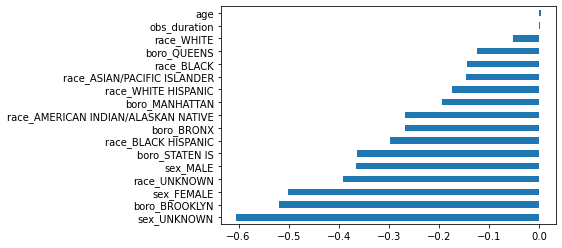

In [14]:
coeffs(slogdf2011, sgetbinary2011, 'searched')

## Optimized Searched 2011

Based on our chi-squared tests, sex, race, and boro have a statistically significant association with whether one is searched in 2011.

In [15]:
soptlogdf2011 = sqf2011copy1[['searched']]  # first, just the 'searched'
soptgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is searched in the 2011 test set:")
LogR(soptlogdf2011, soptgetbinary2011, 'searched')

Using the *optimized* model to predict whether one is searched in the 2011 test set:


'the prediction accuracy as a percentage is 91.6.'

-0.016	sex_FEMALE
0.128	sex_MALE
-0.108	sex_UNKNOWN
-0.054	race_AMERICAN INDIAN/ALASKAN NATIVE
0.066	race_ASIAN/PACIFIC ISLANDER
0.067	race_BLACK
-0.091	race_BLACK HISPANIC
-0.183	race_UNKNOWN
0.163	race_WHITE
0.036	race_WHITE HISPANIC
0.025	boro_BRONX
-0.226	boro_BROOKLYN
0.110	boro_MANHATTAN
0.168	boro_QUEENS
-0.073	boro_STATEN IS


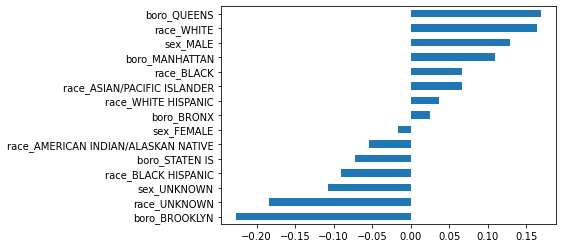

In [16]:
coeffs(soptlogdf2011, soptgetbinary2011, 'searched')

According to the plot, the four variables with the most impact on whether one is searched in 2011 are being being in Queens, White, male, and in Manhattan.

The initial and optimized logistic regression prediciton accuracies are both 91.6 percent. Our chi-squared test determined that observation duration and age have no significant association with whether one is searched in 2011. The bar plot also shows that obs_duration and age have coefficients of 0.002, meaning they have extremely little to no effect on whether one is searched in 2011. Our optimized logistic regression model is run using two less predictor variables but the rounded prediciton accuracies are the same which indicates that observation duration anad age have almost no effect on whether one is searched in 2011. 

## Seached 2019

In [17]:
slogdf2019 = sqf2019copy1[['searched', 'obs_duration', 'age']]  # first, just the 'searched', 'obs_duration', 'age' columns
sgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
LogR(slogdf2019, sgetbinary2019, 'searched')

'the prediction accuracy as a percentage is 58.9.'

0.010	obs_duration
0.002	age
0.221	sex_FEMALE
0.461	sex_MALE
-0.667	sex_UNKNOWN
0.372	race_AMERICAN INDIAN/ALASKAN N
0.158	race_ASIAN / PACIFIC ISLANDER
0.171	race_BLACK
0.111	race_BLACK HISPANIC
-1.058	race_UNKNOWN
0.058	race_WHITE
0.203	race_WHITE HISPANIC
-0.080	boro_BRONX
-0.020	boro_BROOKLYN
-0.052	boro_MANHATTAN
-0.005	boro_QUEENS
0.173	boro_STATEN ISLAND


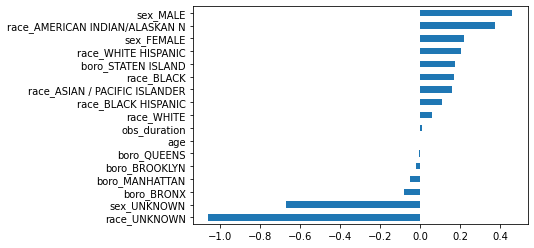

In [18]:
coeffs(slogdf2019, sgetbinary2019, 'searched')

## Optimized Searched 2019

Based on chi squared tests, sex has a statistically significant association with whether someone is searched through the stop and frisk program in 2019. 

In [19]:
optslogdf2019 = sqf2019copy1[['searched']]  # first, just the 'searched'
optsgetbinary2019 = sqf2019copy1[['sex']]
print("Using the *optimized* model to predict whether one is searched in the 2019 test set:")
LogR(optslogdf2019, optsgetbinary2019, 'searched')

Using the *optimized* model to predict whether one is searched in the 2019 test set:


'the prediction accuracy as a percentage is 59.3.'

0.295	sex_FEMALE
0.522	sex_MALE
-0.818	sex_UNKNOWN


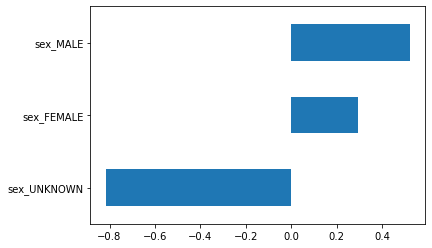

In [20]:
coeffs(optslogdf2019, optsgetbinary2019, 'searched')

According to the plot, being a male is what has the most impact on whether one is searched in 2019.

The initial logistic regression prediciton accuracy is 58.9 percent and our optimized prediciton accuracy is 59.3 percent. Our chi-squared test determined that observation duration, age, race, and borough have no significant association with whether one is searched in 2019. The bar plot also shows that obs_duration and age have coefficients very close to 0, meaning they have little to no effect on whether one is searched in 2019. Given that our optimized logistic regression model is run using only 1 predictor variable and that our optimized model has a higher prediction accuracy than our initial model, it can be inferred that the four un-used predictor variables in our model are not significant factors that influence whether one is searched

## Arrest Made 2011

In [21]:
amlogdf2011 = sqf2011copy1[['arstmade', 'obs_duration', 'age']]  # first, just the 'arstmade', 'obs_duration', 'age' columns
amgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
LogR(amlogdf2011, amgetbinary2011, 'arstmade')

'the prediction accuracy as a percentage is 93.7.'

0.009	obs_duration
0.008	age
-0.199	sex_FEMALE
-0.597	sex_MALE
-0.942	sex_UNKNOWN
0.031	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.289	race_ASIAN/PACIFIC ISLANDER
-0.206	race_BLACK
-0.359	race_BLACK HISPANIC
-0.475	race_UNKNOWN
-0.139	race_WHITE
-0.300	race_WHITE HISPANIC
-0.357	boro_BRONX
-0.660	boro_BROOKLYN
-0.013	boro_MANHATTAN
-0.310	boro_QUEENS
-0.397	boro_STATEN IS


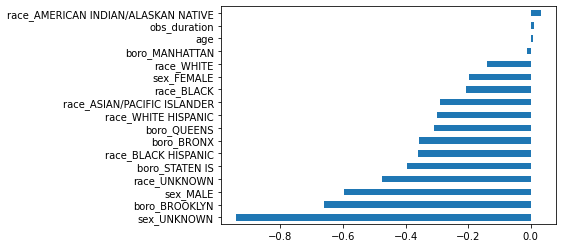

In [22]:
coeffs(amlogdf2011, amgetbinary2011, 'arstmade')

## Optimized Arrest Made 2011

Based on the chi-squared test, sex, race, and boro have a statisitcally significant association with whether one is arrested throug stop and frisk program in 2011.

In [23]:
optamlogdf2011 = sqf2011copy1[['arstmade']]  # first, just the 'arstmade'
optamgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is arrested in the 2011 test set:")
LogR(optamlogdf2011, optamgetbinary2011, 'arstmade')

Using the *optimized* model to predict whether one is arrested in the 2011 test set:


'the prediction accuracy as a percentage is 93.7.'

0.378	sex_FEMALE
-0.020	sex_MALE
-0.360	sex_UNKNOWN
0.269	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.036	race_ASIAN/PACIFIC ISLANDER
0.042	race_BLACK
-0.121	race_BLACK HISPANIC
-0.231	race_UNKNOWN
0.128	race_WHITE
-0.053	race_WHITE HISPANIC
-0.020	boro_BRONX
-0.312	boro_BROOKLYN
0.366	boro_MANHATTAN
0.030	boro_QUEENS
-0.065	boro_STATEN IS


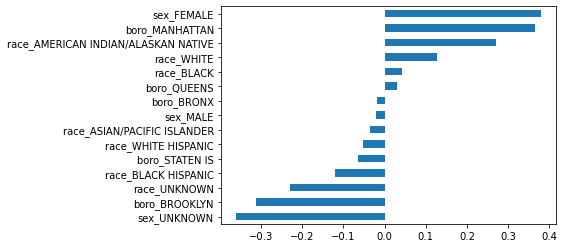

In [24]:
coeffs(optamlogdf2011, optamgetbinary2011, 'arstmade')

According to the plot, the four variables that have the most impact on whether one is arrested through a stop and frisk in 2011 are being a female, in Manhattan, American Indian/Alaskan Native, or White.

The initial and optimized logistic regression prediciton accuracies are both 93.7 percent. Our chi-squared test determined that observation duration and age have no significant association with whether an arrest is made on someone in 2011. The bar plot also shows that obs_duration and age have coefficients of 0.009 and 0.008, respectively, meaning they have extremely little to no effect on whether one is arrested in 2011. Our optimized logistic regression model is run using two less predictor variables but the rounded prediciton accuracies are the same which indicates that observation duration anad age have almost no effect on whether one is arrested in 2011.

## Arrest Made 2019

In [320]:
amlogdf2019 = sqf2019copy1[['arstmade', 'obs_duration', 'age']]  # first, just the 'arstmade', 'obs_duration', 'age' columns
amgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
LogR(amlogdf2019, amgetbinary2019, 'arstmade')

'the prediction accuracy as a percentage is 63.6.'

Based on the chi-squared tests, none of the predictor variables have a statistically significant association with whether one is arrested thorugh the stop and frisk program in 2019.

0.001	obs_duration
-0.004	age
-0.170	sex_FEMALE
-0.353	sex_MALE
0.419	sex_UNKNOWN
0.834	race_AMERICAN INDIAN/ALASKAN N
-0.212	race_ASIAN / PACIFIC ISLANDER
0.132	race_BLACK
-0.111	race_BLACK HISPANIC
-0.879	race_UNKNOWN
0.070	race_WHITE
0.061	race_WHITE HISPANIC
-0.159	boro_BRONX
-0.172	boro_BROOKLYN
0.067	boro_MANHATTAN
-0.019	boro_QUEENS
0.178	boro_STATEN ISLAND


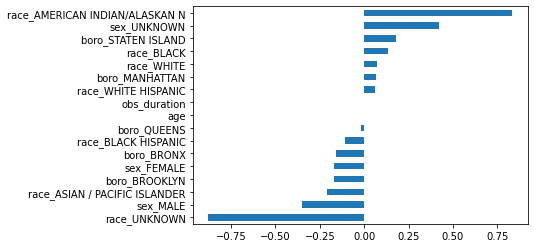

In [321]:
coeffs(amlogdf2019, amgetbinary2019, 'arstmade')

According to the plot, the variables with the most influence on whether one is arrested through stop and frisk in 2019 are being American Indian/Alaskan Native, being in Staten Island, and being black. The factors that are least likely to get arrested through a stop and frisk in 2019 are if they are male, Asian/Pacific Islander, or in Brooklyn. As with the earlier models, observation duration and age have coefficients close to zero which mean they have no close to no effect on whether one is arrested through stop and frisk in 2019.